# Figure 5, SFPQ

In [1]:
library(data.table)
library(ggplot2)
library(stringr)
library(tidyplots)
library(ggpubr)
library(patchwork)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:tidyplots’:

    gene_expression




In [2]:
library('Cairo')
CairoFonts(
regular="Sans:style=Light",
bold="Sans:style=Bold",
italic="Sans:style=Oblique",
bolditalic="Sans:style=BoldOblique"
)

## Fig. 5b

In [3]:
sfpq_11j = fread("Fig_5b_TDP43-7d-KD-11j_SFPQ-isoform_qRT-PCR-quantitation.csv")

In [4]:
unique(sfpq_11j$group)

[1] "TDP43_0.1uM" "TDP43_DMSO"  "scr_0.1uM"   "scr_DMSO"

In [5]:
sfpq_11j$group = factor(sfpq_11j$group, levels = c("scr_DMSO", "scr_0.1uM", "TDP43_DMSO", "TDP43_0.1uM"))

In [6]:
scr_can_plot = ggplot(sfpq_11j, aes(group, normalized_SFPQ_canon_GAPDH2, color = group)) +
    geom_jitter(width = 0.3, size = 0.2, show.legend = F, color = "gray") + 
    stat_summary(fun.data = "mean_se",
                 geom = "errorbar",
                 linewidth = 0.25,
                 width = 0.3,
                 show.legend = F) +
    stat_summary(fun = mean,
                 fun.min = mean,
                 fun.max = mean,
                 geom = "errorbar",
                 linewidth = 0.25,
                 width = 0.5,
                 show.legend = F) +
    stat_compare_means(comparisons = list(c("scr_DMSO", "scr_0.1uM"), 
                                          c("TDP43_DMSO", "TDP43_0.1uM"), 
                                          c("scr_DMSO", "TDP43_DMSO")), 
                       label = "p", 
                       method = "t.test",
                       size = 6/.pt, 
                       label.y = c(1.1, 1.1, 1.2)) +
    scale_x_discrete(name = "", label = c("DMSO", "11j", "DMSO", "11j")) +
    scale_y_continuous(name = "Normalized RNA level", limits = c(0, 1.25), breaks = c(0, 0.5, 1.0)) +
    scale_color_manual(values = c("black","orange", "black","orange")) +
    ggtitle("Canonical isoform") +
    theme_classic(base_size = 6)

In [7]:
scr_alt_plot = ggplot(sfpq_11j, aes(group, normalized_SFPQ_alt_GAPDH2, color = group)) +
    geom_jitter(width = 0.3, size = 0.2, show.legend = F, color = "gray") +   
    stat_summary(fun.data = "mean_se",
                 geom = "errorbar",
                 linewidth = 0.25,
                 width = 0.3,
                 show.legend = F) +
    stat_summary(fun = mean,
                 fun.min = mean,
                 fun.max = mean,
                 geom = "errorbar",
                 linewidth = 0.25,
                 width = 0.5,
                 show.legend = F) +

    stat_compare_means(comparisons = list(c("scr_DMSO", "scr_0.1uM"), 
                                          c("TDP43_DMSO", "TDP43_0.1uM"), 
                                          c("scr_DMSO", "TDP43_DMSO")), 
                     label = "p", 
                     method = "t.test",
                     size = 6/.pt, 
                     label.y = c(7, 7, 8)) +
    scale_x_discrete(name = "", label = c("DMSO", "11j", "DMSO", "11j")) +
    scale_y_continuous(name = NULL, limits = c(0, 8.5), breaks = c(0, 1, 3, 5, 7)) +
    scale_color_manual(values = c("black","orange", "black","orange")) +
    ggtitle("Alternative isoform") +
    theme_classic(base_size = 6)

In [8]:
fig_5b_plot = scr_can_plot + scr_alt_plot

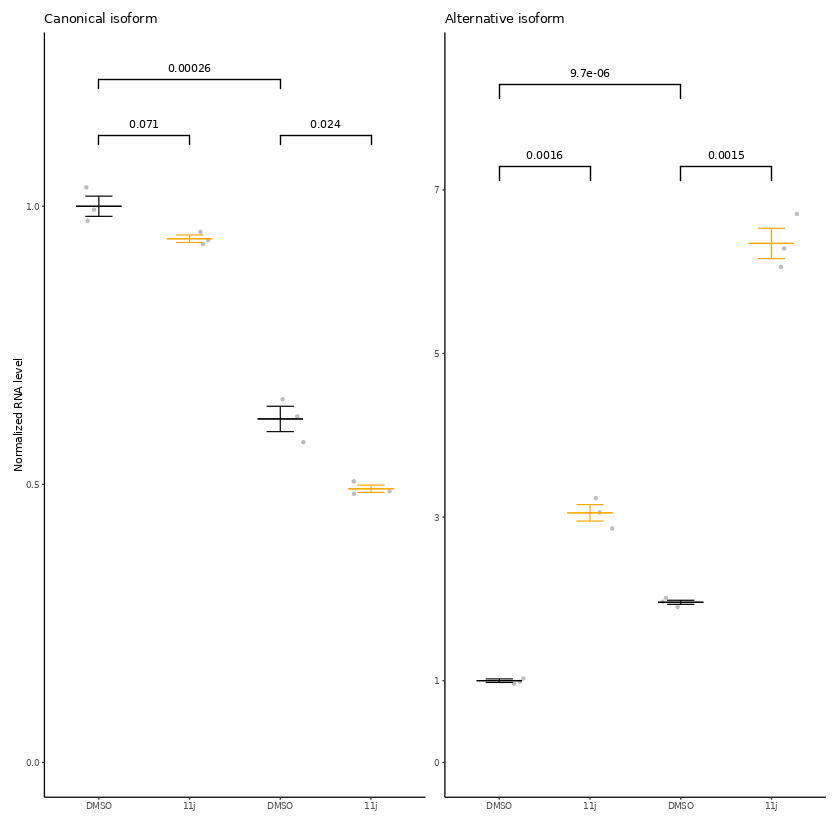

In [9]:
fig_5b_plot

In [10]:
ggsave(fig_5b_plot, filename = "fig_5b_11j_plot.pdf", width = 2.5, height = 1.5, units = "in", dpi = 300)

## Fig. 5c, SFPQ WB

In [11]:
SFPQ_WB = fread("Fig_5c_TDP43-7d-KD_SFPQ-WB-quantitation.csv")

✔ save_plot: saved to fig_5c_TDP43-7D-KD-SFPQ-WB-quantitation-plot.pdf



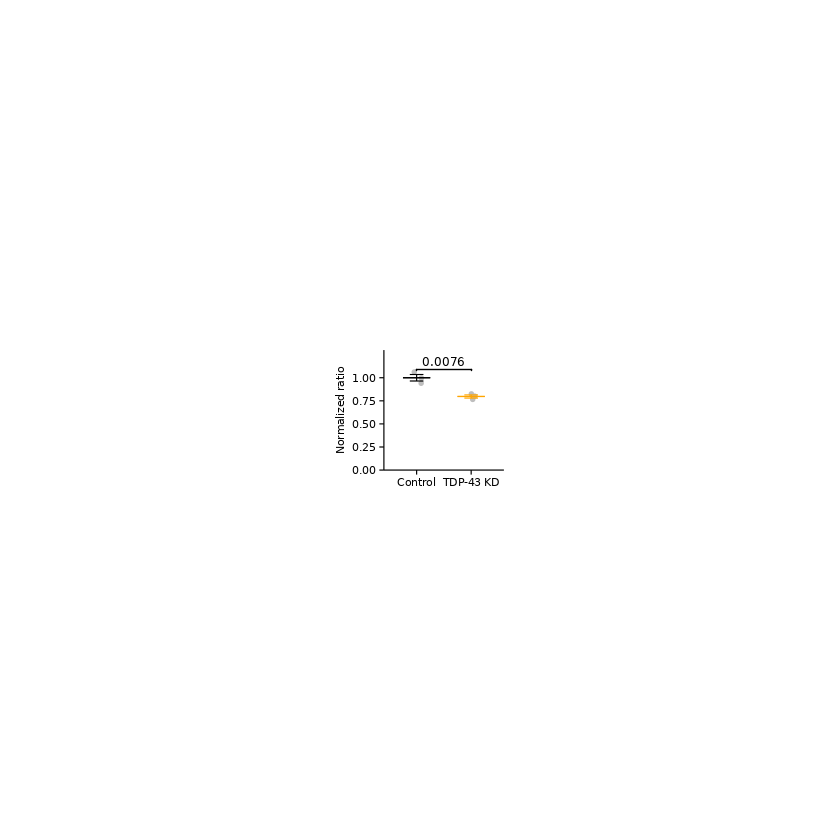

In [13]:
SFPQ_WB[target == "SFPQ"] |>
    tidyplot(x = Sample, y = normalized_ratio, color = Sample) |>
    add_data_points_jitter(jitter_width = 0.2, size = 0.5, color = "gray") |>
    add_mean_dash(width = 0.5) |>
    add_sem_errorbar(width = 0.25) |>
    add_test_pvalue(hide_info = TRUE, 
                    method = "t_test",
                    method.args = list(alternative = "greater"),
                    ref.group = "Control", ) |>
    adjust_colors(new_colors = c("black", "orange")) |> 
    remove_x_axis_title() |>
    adjust_y_axis(title = "Normalized ratio",
                  limits = c(0, 1.3), breaks = c(0, 0.25, 0.5, 0.75, 1.0)) |>
    remove_legend() |>
    adjust_size(width = 1, height = 1, unit = "in") |>
    adjust_font(fontsize = 6) |>
    save_plot("fig_5c_TDP43-7D-KD-SFPQ-WB-quantitation-plot.pdf", 
              view_plot = TRUE,
              bg = "transparent",
              dpi = 300)

✔ save_plot: saved to fig_5c_TDP43-7D-KD-TDP-43-WB-quantitation-plot.pdf



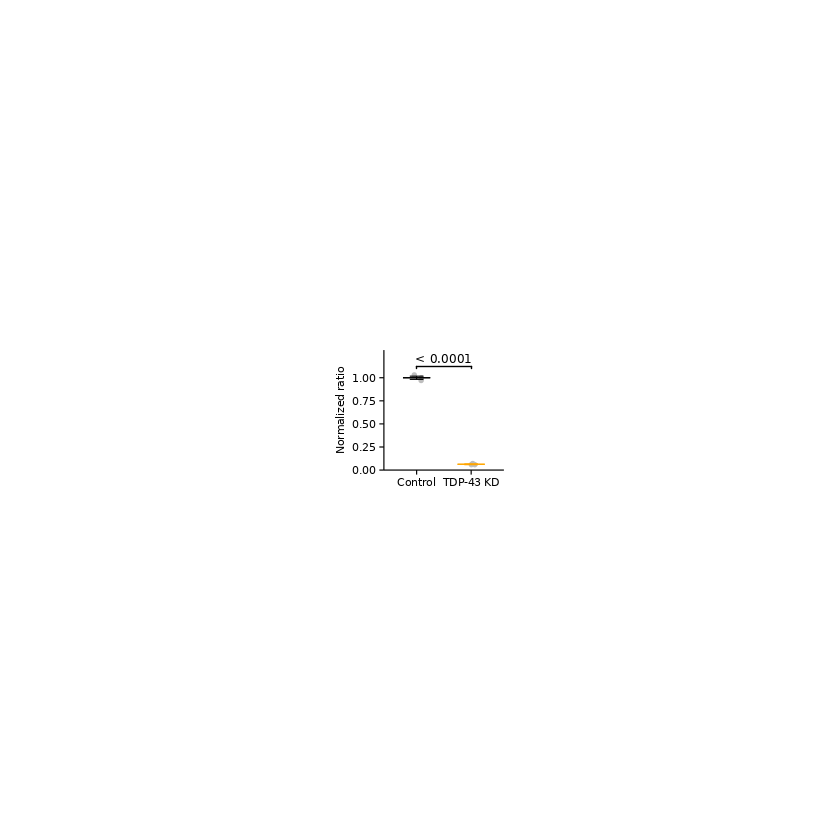

In [14]:
SFPQ_WB[target == "TDP-43"] |>
    tidyplot(x = Sample, y = normalized_ratio, color = Sample) |>
    add_data_points_jitter(jitter_width = 0.2, size = 0.5, color = "gray") |>
    add_mean_dash(width = 0.5) |>
    add_sem_errorbar(width = 0.25) |>
    add_test_pvalue(hide_info = TRUE, 
                    method = "t_test",
                    method.args = list(alternative = "greater"),
                    ref.group = "Control", ) |>
    adjust_colors(new_colors = c("black", "orange")) |> 
    remove_x_axis_title() |>
    adjust_y_axis(title = "Normalized ratio",
                  limits = c(0, 1.3), breaks = c(0, 0.25, 0.5, 0.75, 1.0)) |>
    remove_legend() |>
    adjust_size(width = 1, height = 1, unit = "in") |>
    adjust_font(fontsize = 6) |>
    save_plot("fig_5c_TDP43-7D-KD-TDP-43-WB-quantitation-plot.pdf", 
              view_plot = TRUE,
              bg = "transparent",
              dpi = 300)

## Fig. 5d,e

>From Vidhya (Petrucelli lab)

In [15]:
sessionInfo()

R version 4.2.0 (2022-04-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /share/software/user/open/openblas/0.3.10/lib/libopenblas_haswellp-r0.3.10.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] Cairo_1.6-2       patchwork_1.2.0   ggpubr_0.6.0      tidyplots_0.2.2  
[5] stringr_1.5.1     ggplot2_3.5.0     data.table_1.15.2

loaded via a namespace (and not attached):
 [1] pillar_1.9.0      compiler_4.2.0    base64enc_0.1-3   tools_4.2.0      
 [5] getPass_0.2-4     digest_0.6.3